In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [32]:
# Load the fraud check dataset
data = pd.read_csv('fraud_check.csv')

In [33]:
# Select the specified columns
selected_columns = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience', 'Urban']
data = data[selected_columns]

In [34]:
# Preprocess the data
# Encode categorical variables (Undergrad, Marital.Status, Urban)
label_encoder = LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [35]:
# Standardize the data (important for k-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [36]:
# Perform k-means clustering with a specified number of clusters (e.g., 2)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)


In [37]:
# Define a mapping from cluster labels to 'Urban' labels
cluster_to_urban = {0: 'NO', 1: 'YES'}


In [38]:
# Map cluster labels to 'Urban' labels
data['Predicted_Urban'] = [cluster_to_urban[label] for label in kmeans.labels_]

In [39]:
# Convert 'Urban' column to integer labels (0 and 1)
data['Urban'] = data['Urban'].map({'NO': 0, 'YES': 1})

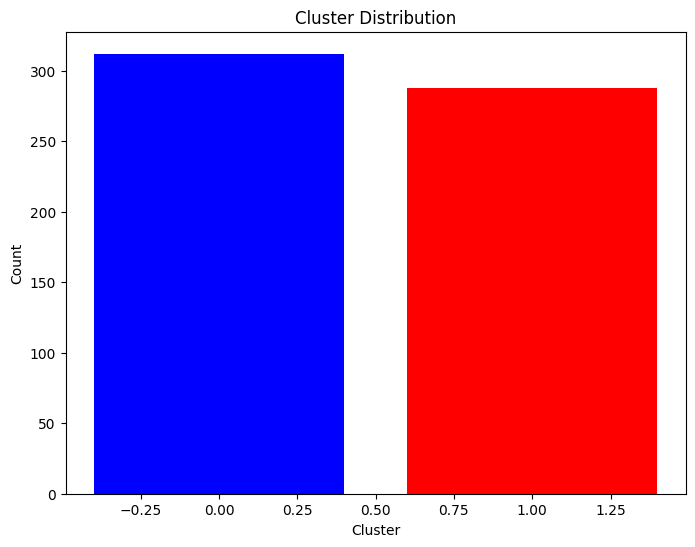

In [40]:
# Create a bar graph to visualize the cluster distribution
cluster_counts = data['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color=['blue', 'red'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

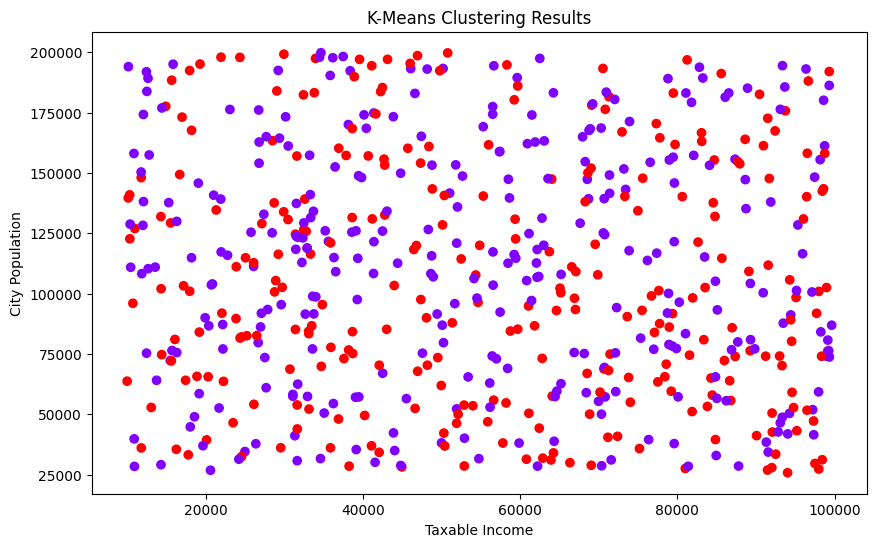

In [24]:
# Create a scatter plot for visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['Taxable.Income'], data['City.Population'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Taxable Income')
plt.ylabel('City Population')
plt.title('K-Means Clustering Results')
plt.show()